In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [3]:
data = pd.read_excel("D:/Assignment/Clustering/EastWestAirlines.xlsx",sheet_name=1)

In [4]:
data.head(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler
trans= MinMaxScaler()
df_norm= pd.DataFrame(trans.fit_transform(data))
df_norm

In [7]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan.fit(df_norm)         


DBSCAN(eps=0.8)

In [8]:
dbscan.labels_ 

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [9]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster']) 
cl.value_counts()

cluster
0          2518
1          1481
dtype: int64

In [10]:
data_1= pd.concat([data,cl],axis=1)
data_1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


Text(0.5, 1.0, 'Clusters using DBScan')

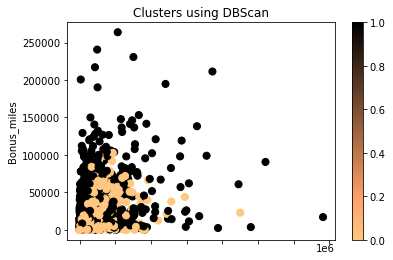

In [11]:
data_1.plot(x="Balance",y ="Bonus_miles",c=dbscan.labels_ ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using DBScan')   

In [12]:
dl = dbscan.labels_ 
from sklearn.metrics import silhouette_score
silhouette_score(df_norm, dl)

0.4701970394742716

In [13]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=3)
y_kmeans = clf.fit_predict(df_norm) 
y_kmeans 

array([2, 2, 2, ..., 1, 0, 0])

In [14]:
cl1=pd.DataFrame(y_kmeans,columns=['Kcluster']) 
cl1

,Kcluster
0,2
1,2
2,2
3,2
4,1
...,...
3994,1
3995,1
3996,1
3997,0


In [15]:
data_2= pd.concat([data,cl1],axis=1) 
data_2

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Kcluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


Text(0.5, 1.0, 'Clusters using KMeans')

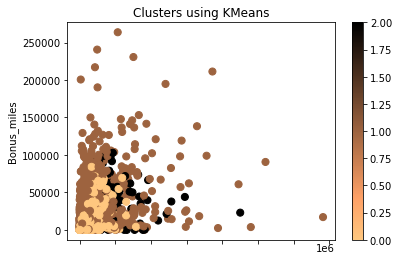

In [16]:
data_2.plot(x="Balance",y ="Bonus_miles",c=y_kmeans ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using KMeans')   

In [17]:
silhouette_score(df_norm,y_kmeans)# KMeans cluster slighty improves the accuracy

0.3919161700635261

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

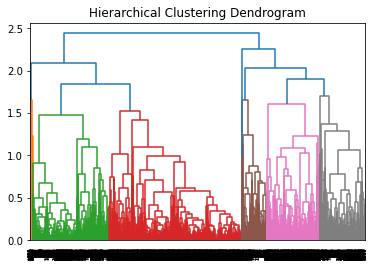

In [18]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch
dendrogram= sch.dendrogram(sch.linkage(df_norm,method="complete",metric="euclidean"))
plt.title('Hierarchical Clustering Dendrogram')

In [23]:
hc_1= AgglomerativeClustering(n_clusters= 5, affinity= "euclidean", linkage= "single").fit(df_norm)

cluster_labels=pd.Series(hc_1.labels_)
cluster_labels
data['clust']=cluster_labels # creating a  new column and assigning it to new column 
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


Text(0.5, 1.0, 'Clusters using Hierarchial')

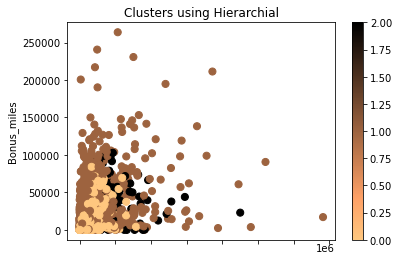

In [24]:
data.plot(x="Balance",y ="Bonus_miles",c=y_kmeans ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using Hierarchial')   